# E-tivity 3: Linear classification
## MSc in AI - CE6002 & CS5062
Student Name: Michel Danjou

Student ID: 18263461

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

# Task 3 (CE6002)
#### *Create your own implementation of linear classification to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification. Notebook Etivity3_LinearClassification.ipynb is available in the git repository. Add your code to this notebook.*
 
Interesting reads: 
  * https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/
  * https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.9-The-Moore-Penrose-Pseudoinverse/


X.shape        :(1000, 2)
y.len          :1000
X_inverse      :[[ 0.00166429 -0.00214436 -0.000632   ... -0.00215085  0.00056084
  -0.0019115 ]
 [-0.00108522  0.00125729 -0.00184757 ... -0.00035897 -0.00183349
   0.00050994]]
X_inverse.shape:(2, 1000)
w_lin          :[ 0.00322739 -0.00435116]
w_lin_dot      :[ 0.00322739 -0.00435116]
minx           : -1.1080864425343167
maxx           : 1.0971174292620183
vert.shape     : (1000, 2)


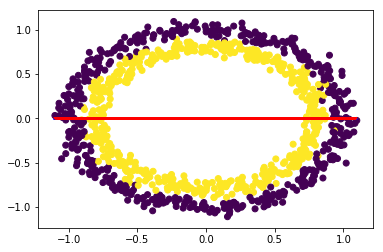

In [4]:
# Calculate pseudo-inverse
X_inverse = np.linalg.pinv(X)
w_lin = np.matmul(X_inverse, y)
w_lin_dot = X_inverse.dot(y)

minx = np.amin(X)
maxx = np.amax(X)
horz = np.linspace(minx, maxx, 1000)
vert = w_lin[0]*X + w_lin[1]

print("X.shape        :{}".format(X.shape))
print("y.len          :{}".format(len(y)))
print("X_inverse      :{}".format(X_inverse ))
print("X_inverse.shape:{}".format(X_inverse.shape ))
print("w_lin          :{}".format(w_lin))
print("w_lin_dot      :{}".format(w_lin_dot))
print("minx           :", minx)
print("maxx           :", maxx)
print("vert.shape     :", vert.shape)


plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(horz, vert, color='blue')

# Alternative approach for drawing the separating line.
yhat = X.dot(w_lin)
plt.plot(X, yhat, color='red')
#plt.plot(X, np.sign(yhat), color='red')
#plt.plot(X, y, color='red')
sign = np.sign(yhat)


#### *Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).*

The demarcation mark between the 2 sets of data is correct as it evenly splits both values representing each y values. However it is of no real value.



#### *Now choose suitable new features and use these in your linear regression algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!*

Interesting reads: 
  *   https://www.deeplearningbook.org/contents/ml.html (page 110, figure 5.16)

In [5]:
Xcopy = np.copy(X)

## Attempt 2 - Adding bias to X square array

X.shape        :(1000, 3)
y.len          :1000
X_inverse      :[[ 0.00415669 -0.00369689  0.0046161  ...  0.00126921  0.00512403
   0.00425719]
 [-0.00307668  0.00712567 -0.00581605 ...  0.00180234 -0.00644788
  -0.00234513]
 [-0.00456139  0.00424258 -0.00293671 ... -0.00245094 -0.00353409
  -0.00553498]]
X_inverse.shape:(3, 1000)
w_lin          :[ 3.68890269 -4.46634815 -4.46065657]
w_lin_dot      :[ 3.68890269 -4.46634815 -4.46065657]
minx           : 2.538349551610603e-08
maxx           : 1.2278555641283575
miny           : 0.8269864596458466
maxy           : -0.4024357645302676


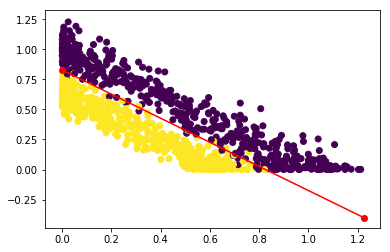

In [6]:
X = np.copy(Xcopy)

# Square the data
Xsq = np.square(X)

# Add bias=1 column
X = np.insert(Xsq, 0, 1, axis=1)

# Calculate pseudo-inverse
X_inverse = np.linalg.pinv(X)
w_lin = np.matmul(X_inverse, y)
w_lin_dot = X_inverse.dot(y)

# Plot the data set
plt.scatter(X[:,1], X[:,2], c=y)

# Plot the boundary
def decision_boundary_lin(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

minx = np.amin(Xsq)
maxx = np.amax(Xsq)

miny, maxy = decision_boundary_lin(w_lin, minx, maxx)
plt.plot([minx, maxx], [miny, maxy], 'ro-')

# Debug - Remove
print("X.shape        :{}".format(X.shape))
print("y.len          :{}".format(len(y)))
print("X_inverse      :{}".format(X_inverse ))
print("X_inverse.shape:{}".format(X_inverse.shape ))
print("w_lin          :{}".format(w_lin))
print("w_lin_dot      :{}".format(w_lin_dot))
print("minx           :", minx)
print("maxx           :", maxx)
print("miny           :", miny)
print("maxy           :", maxy)


#### *Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.*